## 1.Intro
- Find topic in KSCT & SFIT jouranl using  Latent Dirichlet Allocation (LDA) algorithm

## 2.Reference
- [LDA](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)
- [TF-IDF](https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/)

## Contents
[3. Prerequisites](#3.-Prerequisites)  
[4. Import packages](#4.-Import-packages)  
[5. Import data](#5.-Import-data)  
[6. Text data pre-process(step1)](#6.-Text-data-pre\-process(step1))  
    [(1) Delete special chatacter](#(1)-Delete-special-chatacter)  
    [(2) Tokenize](#(2)-Tokenize)  
    [(3) Remove english stopwords](#(3)-Remove-english-stopwords)  
    [(4) Make bigrams](#(4)-Make-bigrams)  
    [(5) Lemmatization](#(5)-Lemmatization)  
    [(6) Extract noun](#(6)-Extract-noun)  
[7. Text data pre-process(step2/TFIDF)](#7.-Text-data-pre\-process(step2/TFIDF))   
[8. Create corpus needed for topic modeling](#8.-Create-corpus-needed-for-topic-modeling)  
[9. Perplexity & coherence score](#9.-Perplexity-&-coherence-score)  
[10. Create LDA model](#10.-Create-LDA-model)  
[11. View the topic in LDA model](#11.-View-the-topic-in-LDA-model)  
[12. Inferring the topic from keywords](#12.-Inferring-the-topic-from-keywords)  
[13. Confirm topic for each article](#13.-Confirm-topic-for-each-article)

## 3. Prerequisites

In [1]:
# Down load stopword from nltk
# import nltk; nltk.download('stopwords')

# prepare stopwords
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

# !python3 -m spacy download en (delete # for download spacy model)

## 4. Import packages

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim for LDA
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.phrases import Phrases, Phraser

#spacy for lemmatization
import spacy

#sklearn for TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#poltting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

## 5. Import data

In [7]:
# Road data
df_ksct = pd.read_csv("ksct_origin.csv")
# df_sfti = pd.read_csv("sfti.csv")

In [8]:
# Data extract
# df_ksct = df_ksct[["title_english", "abstract", "year"]]
# df = pd.concat([df_ksct, df_sfti], axis = 0)
df_ksct["total"] = df_ksct["title_english"] + df_ksct["abstract"]
df_ksct["total"] = df_ksct["total"].apply(lambda x: str(x))

In [9]:
len(df_ksct)

1162

## 6. Text data pre-process(step1)
### (1) Delete special chatacter

In [10]:
data_li = df_ksct.total.values.tolist()
data_li = [re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》\:\;]', '', doc) for doc in data_li]
data_li = [re.sub(r"\s+", " ", i) for i in data_li]
data_li[:1]

<>:2: DeprecationWarning: invalid escape sequence \?
<>:2: DeprecationWarning: invalid escape sequence \?
<>:2: DeprecationWarning: invalid escape sequence \?
<ipython-input-10-14dcc18311d7>:2: DeprecationWarning: invalid escape sequence \?
  data_li = [re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》\:\;]', '', doc) for doc in data_li]


[' The Study of CSR Communication Effectiveness of Fashion Store DesignMost corporations engage in Corporate Social Responsibility CSR activities Consumers are aware of CSR activities in different domains and use the perception and evaluation in purchase decision making This study reveals how the relationship between consumer perception about a fashion corporations CSR activities and product evaluation such as perceived expertise and attractiveness affects behavioral intention This study discussed implications for store designs depending on whether it is actively engaging in CSR communication Two virtual fashion store images of modern or eco design were used as stimuli The study was conducted from July to August 2018 based on women in their 20s and 30s We collected 154 eco designs and 157 modern design responses The findings of the study show that consumer perceptions of CSR activities affected perceived expertise and attractiveness Further perceived expertise and attractiveness led to

### (2) Tokenize
- token docs by a word

In [11]:
data_tokenize = [gensim.utils.simple_preprocess(str(data), deacc=True) for data in data_li] # deacc=True removes punctuations
print(data_tokenize[:1])

[['the', 'study', 'of', 'csr', 'communication', 'effectiveness', 'of', 'fashion', 'store', 'designmost', 'corporations', 'engage', 'in', 'corporate', 'social', 'responsibility', 'csr', 'activities', 'consumers', 'are', 'aware', 'of', 'csr', 'activities', 'in', 'different', 'domains', 'and', 'use', 'the', 'perception', 'and', 'evaluation', 'in', 'purchase', 'decision', 'making', 'this', 'study', 'reveals', 'how', 'the', 'relationship', 'between', 'consumer', 'perception', 'about', 'fashion', 'corporations', 'csr', 'activities', 'and', 'product', 'evaluation', 'such', 'as', 'perceived', 'expertise', 'and', 'attractiveness', 'affects', 'behavioral', 'intention', 'this', 'study', 'discussed', 'implications', 'for', 'store', 'designs', 'depending', 'on', 'whether', 'it', 'is', 'actively', 'engaging', 'in', 'csr', 'communication', 'two', 'virtual', 'fashion', 'store', 'images', 'of', 'modern', 'or', 'eco', 'design', 'were', 'used', 'as', 'stimuli', 'the', 'study', 'was', 'conducted', 'from',

### (3) Remove english stopwords
- remove stopwords which offer in nltk package

In [12]:
data_stopword = [[word for word in doc if word not in stopwords] for doc in data_tokenize]
print(data_stopword[:1])

[['study', 'csr', 'communication', 'effectiveness', 'fashion', 'store', 'designmost', 'corporations', 'engage', 'corporate', 'social', 'responsibility', 'csr', 'activities', 'consumers', 'aware', 'csr', 'activities', 'different', 'domains', 'use', 'perception', 'evaluation', 'purchase', 'decision', 'making', 'study', 'reveals', 'relationship', 'consumer', 'perception', 'fashion', 'corporations', 'csr', 'activities', 'product', 'evaluation', 'perceived', 'expertise', 'attractiveness', 'affects', 'behavioral', 'intention', 'study', 'discussed', 'implications', 'store', 'designs', 'depending', 'whether', 'actively', 'engaging', 'csr', 'communication', 'two', 'virtual', 'fashion', 'store', 'images', 'modern', 'eco', 'design', 'used', 'stimuli', 'study', 'conducted', 'july', 'august', 'based', 'women', 'collected', 'eco', 'designs', 'modern', 'design', 'responses', 'findings', 'study', 'show', 'consumer', 'perceptions', 'csr', 'activities', 'affected', 'perceived', 'expertise', 'attractiven

### (4) Make bigrams

In [13]:
# Build the bigram models
bigram_model  = Phraser(Phrases(data_tokenize, min_count=5, threshold=100)) #Phraser(tunning) :use less RAM, faster processing.

# transform
data_bigram = [bigram_model[doc] for doc in data_stopword] #Caution not '()' but '[]' next to bigram_model
print(data_bigram[:1])

[['study', 'csr', 'communication', 'effectiveness', 'fashion', 'store', 'designmost', 'corporations', 'engage', 'corporate', 'social', 'responsibility', 'csr_activities', 'consumers', 'aware', 'csr_activities', 'different', 'domains', 'use', 'perception', 'evaluation', 'purchase', 'decision_making', 'study', 'reveals', 'relationship', 'consumer', 'perception', 'fashion', 'corporations', 'csr_activities', 'product', 'evaluation', 'perceived', 'expertise', 'attractiveness', 'affects', 'behavioral', 'intention', 'study', 'discussed', 'implications', 'store', 'designs', 'depending', 'whether', 'actively', 'engaging', 'csr', 'communication', 'two', 'virtual', 'fashion', 'store', 'images', 'modern', 'eco', 'design', 'used', 'stimuli', 'study', 'conducted', 'july', 'august', 'based', 'women', 'collected', 'eco', 'designs', 'modern', 'design', 'responses', 'findings', 'study', 'show', 'consumer', 'perceptions', 'csr_activities', 'affected', 'perceived', 'expertise', 'attractiveness', 'perceive

### (5) Lemmatization

In [14]:
# make lemmatizaion model
nlp = spacy.load('en', disable=['parser', 'ner'])

# transform
data_lemmatization = [nlp(" ".join(doc)) for doc in data_bigram]

#example
data_lemmatization[0][0].lemma_, data_lemmatization[0][0].pos_

('study', 'VERB')

### (6) Extract noun

In [15]:
data_noun = [[token.lemma_ for token in doc if token.pos_ in ['NOUN']] for doc in data_lemmatization]
print(data_noun[:1])

[['effectiveness', 'fashion', 'store', 'corporation', 'responsibility', 'consumer', 'domain', 'perception', 'evaluation', 'purchase', 'decision_making', 'study', 'relationship', 'consumer', 'perception', 'fashion', 'corporation', 'product', 'evaluation', 'expertise', 'attractiveness', 'intention', 'study', 'implication', 'store', 'design', 'csr', 'communication', 'fashion', 'store', 'design', 'study', 'woman', 'design', 'response', 'finding', 'study', 'consumer', 'perception', 'expertise', 'attractiveness', 'expertise', 'attractiveness', 'purchase', 'intention', 'time', 'store', 'store', 'design', 'variation', 'difference', 'value', 'consumer', 'perception', 'evaluation', 'purchase', 'intention', 'store', 'design', 'corporation', 'capability']]


## 7. Text data pre-process(step2/TFIDF)
- At this stage, important words are extracted using "TFIDF" algorithm.

In [18]:
def tfidfword_extractor(num_extract, data_noun):
    #Concatenate string
    data_concat = [" ".join(doc) for doc in data_noun]
    
    # TF-IDF score
    tfidv = TfidfVectorizer()
    tfidf_result = tfidv.fit_transform(data_concat)
    
    tfidf_df = pd.DataFrame(tfidf_result.toarray(), columns = tfidv.get_feature_names())#show tf-idf score by words and the number of document
    tfidf_transposed=tfidf_df.T

    tfidf_rank=[]
    for n in range(0,len(df_ksct)):
        row=tfidf_transposed.loc[:,n]
        row_sort=row.sort_values(axis=0, ascending=False)
        row_index=row_sort.index[0:num_extract]
        row_list = list(row_index)
        tfidf_rank.append(row_list)

    tfidf_1 = list(set(sum(tfidf_rank,[])))
    data_final = [[word for word in doc if word in tfidf_1] for doc in data_noun]
    
    return data_final

In [19]:
# example
data_final = tfidfword_extractor(10, data_noun)
len(data_final)

1162

## 8. Create corpus needed for topic modeling

In [20]:
# Create Dictionary
id2word = corpora.Dictionary(data_final)

# Term Document Frequency
corpus = [id2word.doc2bow(doc) for doc in data_final]
 
# View
print(corpus[1:2]) # (token_id, token_count)

[[(3, 6), (19, 1), (22, 4), (23, 3), (27, 1), (28, 1), (29, 21), (30, 11), (31, 1), (32, 2), (33, 9), (34, 1), (35, 1), (36, 7), (37, 2), (38, 1), (39, 1), (40, 1), (41, 3), (42, 1), (43, 2), (44, 1), (45, 1)]]


### 9. Perplexity & coherence score
- To find out optimal LDA model with perplexity & coherence score based on the numbers of importance words and topics. Generally coherence score is more powful.

In [21]:
def hyper_lda_score(list_topN, list_topicN):
    score = []
    for num_extract in list_topN:
        data_final = tfidfword_extractor(num_extract, data_noun)
        
        # Create Dictionary
        id2word = corpora.Dictionary(data_final)
        # Term Document Frequency
        corpus = [id2word.doc2bow(doc) for doc in data_final]

        for num_topic in list_topicN:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=num_topic,random_state=100,update_every=1,chunksize=100,passes=10,
        alpha='auto',per_word_topics=True)
            coherence_model_lda = CoherenceModel(model=lda_model, texts=data_final, dictionary=id2word, coherence='c_v')
            coherence_lda = coherence_model_lda.get_coherence()

            score.append({"highst_num" : str(num_extract)
                          ,"topic_num" : str(num_topic)
                          ,"perplexity" : float(format(lda_model.log_perplexity(corpus), ".5f"))
                          ,"coherence" :  float(format(coherence_lda, ".5f"))})

            print("{}({})".format(num_extract, num_topic), end=",  ")
    return score

In [22]:
list_topN = range(8,12+1)
list_topicN = range(5,10+1)
score = hyper_lda_score(list_topN, list_topicN)

8(5),  8(6),  8(7),  8(8),  8(9),  8(10),  9(5),  9(6),  9(7),  9(8),  9(9),  9(10),  10(5),  10(6),  10(7),  10(8),  10(9),  10(10),  11(5),  11(6),  11(7),  11(8),  11(9),  11(10),  12(5),  12(6),  12(7),  12(8),  12(9),  12(10),  

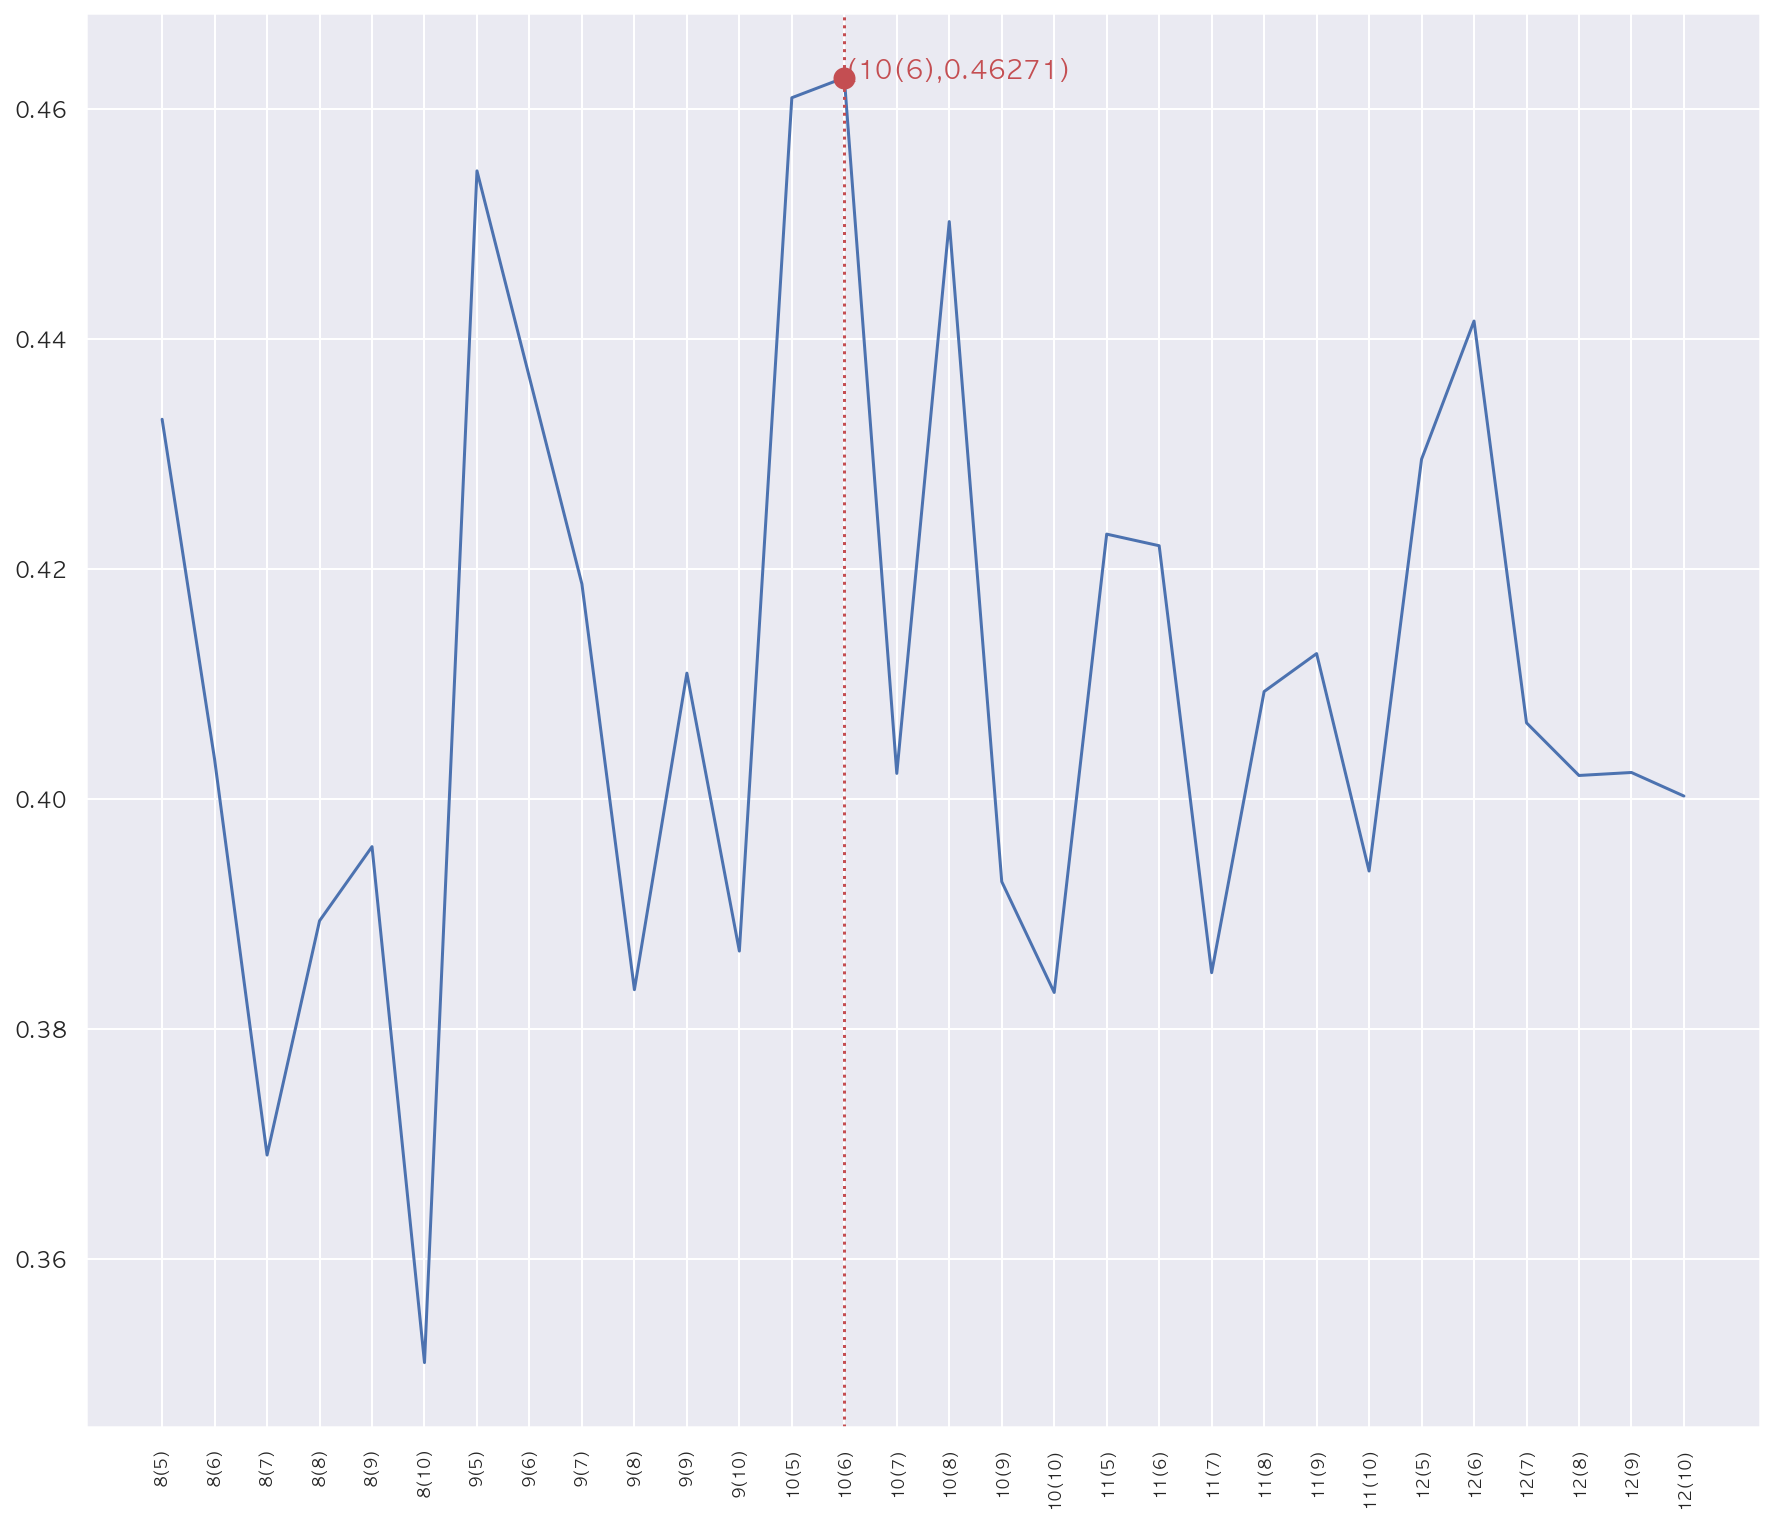

In [46]:
score_df = pd.DataFrame(score)
score_df['X'] = score_df['highst_num'] + "(" + score_df['topic_num']  + ")"
x_max_label = score_df.loc[score_df.coherence == score_df['coherence'].max()].X.values[0]
y_max = score_df['coherence'].max()

plt.figure(figsize=(15,13))
plt.plot(score_df['X'],score_df['coherence'])
plt.plot(x_max_label, y_max, 'ro', ms=10)
plt.text(x_max_label, y_max, "({},{})".format(x_max_label, y_max), fontdict={"size": 13, "color": "r"})
plt.axvline(x_max_label, color='r', linestyle=':')
plt.xticks(rotation=90, fontsize='small')
plt.show()

## 10. Create LDA model

In [51]:
x_re = re.search("(\d+)\(+(\d)+\)",  x_max_label)
x_num = int(x_re.group(1))
x_max = x_re.group(2)

<>:1: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
<ipython-input-51-7085c5352d51>:1: DeprecationWarning: invalid escape sequence \d
  x_re = re.search("(\d+)\(+(\d)+\)",  x_max_label)


In [52]:
x_num 

10

In [56]:
x_re = re.search("(\d+)\(+(\d)+\)",  x_max_label)
x_extract = int(x_re.group(1))
x_max = int(x_re.group(2))

data_final = tfidfword_extractor(x_extract, data_noun)
id2word = corpora.Dictionary(data_final)
corpus = [id2word.doc2bow(doc) for doc in data_final]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
id2word=id2word,
num_topics=x_max,
random_state=100,
update_every=1,
chunksize=100,
passes=10,
alpha='auto',
per_word_topics=True)

<>:1: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
<ipython-input-56-3dbba1674925>:1: DeprecationWarning: invalid escape sequence \d
  x_re = re.search("(\d+)\(+(\d)+\)",  x_max_label)


## 11. View the topic in LDA model

In [57]:
# Print the Keyword in the N topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.076*"fashion" + 0.034*"market" + 0.032*"industry" + 0.022*"study" + '
  '0.020*"system" + 0.020*"company" + 0.019*"firm" + 0.018*"distribution" + '
  '0.017*"strategy" + 0.016*"merchandise"'),
 (1,
  '0.059*"consumer" + 0.053*"type" + 0.046*"product" + 0.045*"purchase" + '
  '0.033*"study" + 0.030*"situation" + 0.025*"effect" + 0.023*"attitude" + '
  '0.022*"intention" + 0.020*"model"'),
 (2,
  '0.139*"store" + 0.086*"apparel" + 0.049*"consumer" + 0.042*"product" + '
  '0.040*"price" + 0.029*"type" + 0.023*"quality" + 0.021*"performance" + '
  '0.016*"satisfaction" + 0.015*"characteristic"'),
 (3,
  '0.150*"clothing" + 0.029*"factor" + 0.028*"effect" + 0.023*"study" + '
  '0.023*"behavior" + 0.023*"style" + 0.021*"involvement" + 0.020*"variable" + '
  '0.019*"student" + 0.016*"age"'),
 (4,
  '0.101*"shopping" + 0.047*"risk" + 0.038*"service" + 0.036*"factor" + '
  '0.036*"customer" + 0.036*"internet" + 0.034*"relationship" + '
  '0.029*"analysis" + 0.024*"satisfaction" + 0.02

In [69]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.054066  0.099866       1        1  24.400183
3      0.083190  0.254523       2        1  20.875872
1      0.031951 -0.081543       3        1  17.947577
4      0.094866 -0.005001       4        1  14.043037
2      0.115259 -0.252928       5        1  13.452201
0     -0.379331 -0.014918       6        1   9.281126, topic_info=    Category         Freq      Term        Total  loglift  logprob
166  Default  3167.000000  clothing  3167.000000  30.0000  30.0000
22   Default  1884.000000     store  1884.000000  29.0000  29.0000
74   Default  1422.000000  shopping  1422.000000  28.0000  28.0000
29   Default  2283.000000     brand  2283.000000  27.0000  27.0000
224  Default  1180.000000   apparel  1180.000000  26.0000  26.0000
..       ...          ...       ...          ...      ...      ...
23    Topic6   207.725983     study  2326.354736  -0.0387  -3.7943
215   Topic6    83.759750     order   189.408356   1.5612  -4.7026
182   Topic6    72.681030      case   144.048462   1.6931  -4.8445
55    Topic6    90.375168  research   480.111633   0.7071  -4.6266
174   Topic6    86.492905   purpose  1052.335815  -0.1215  -4.6705

[375 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
241       2  0.981498  achievement
89        2  0.351197     activity
89        3  0.074496     activity
89        6  0.574686     activity
894       1  0.990897           ad
...     ...       ...          ...
26        2  0.501818        woman
26        3  0.024433        woman
26        4  0.137201        woman
862       6  0.991100         work
691       6  0.972016       worker

[538 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 2, 5, 3, 1])

## 12. Inferring the topic from keywords

In [100]:
keywords = []
for num in range(0, x_max):
    a = re.findall('\"\w+\"', keyword[num][1])
    keywords.append(a)

<>:3: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<ipython-input-100-dffcde166afe>:3: DeprecationWarning: invalid escape sequence \w
  a = re.findall('\"\w+\"', keyword[num][1])


In [101]:
pd.DataFrame({"keywords" : keywords
              ,"topic":["fashion_industry","consumer", "store", "clothing_behavior", "shopping", "brand"]
})

,keywords,topic
0,"[""fashion"", ""market"", ""industry"", ""study"", ""sy...",fashion_industry
1,"[""consumer"", ""type"", ""product"", ""purchase"", ""s...",consumer
2,"[""store"", ""apparel"", ""consumer"", ""product"", ""p...",store
3,"[""clothing"", ""factor"", ""effect"", ""study"", ""beh...",clothing_behavior
4,"[""shopping"", ""risk"", ""service"", ""factor"", ""cus...",shopping
5,"[""brand"", ""group"", ""image"", ""factor"", ""consume...",brand


## 13. Confirm topic for each article

In [102]:
categories = {
    0: "fashion_industry",
    1: "consumer",
    2: "store",
    3: "clothing_behavior",
    4: "shopping",
    5: "brand",
}

In [103]:
# Get the topic distribution for the given document.
topic_proba = []
for i in corpus:
    doc_topics =lda_model.get_document_topics(i,minimum_probability=0.0)
    topic_proba.append(doc_topics)

In [104]:
topic_doc = [max(doc_proba, key=lambda x: x[1]) for doc_proba in topic_proba]
topic_proba_df=pd.DataFrame(topic_doc, columns = ['topic', 'proba'])
df = pd.concat([df_ksct,topic_proba_df], axis=1)

In [105]:
df = df[["title_korean", "title_english", "topic", "proba"]]

In [106]:
df["topic"] = df["topic"].apply(lambda data: categories[data])

In [107]:
df

,title_korean,title_english,topic,proba
0,패션 매장 디자인의 CSR 커뮤니케이션 효율성에 관한 연구,The Study of CSR Communication Effectiveness ...,consumer,0.491968
1,여고생의 중저가 화장품 점포 내 브랜드체험이 브랜드몰입과 충성도에 미치는 영향,Effects of Brand Experience in Mass Cosmetic ...,brand,0.498298
2,"해시태그 유형이 인플루언서 및 패션 정보 평가, 수용자 반응에 미치는 영향",The Effects of Hashtag Type on Evaluations of...,consumer,0.872605
3,UTAUT 모델을 응용한 패션 증강현실(FAR) 기술수용에 관한 한국 20대 여성의...,"Consumer Attitudes, Intention to Use Technolo...",consumer,0.834754
4,노년여성의 연령차별 인식과 외모만족도가 외모관련 삶의 질에 미치는 영향,The Effects of Perceived Ageism and Appearanc...,clothing_behavior,0.769864
...,...,...,...,...
1157,"사회적 상호작용에서의 의복의 의미(Ⅱ) : 한복을 중심으로, Emphasis on ...",The present research investigated perceptions ...,clothing_behavior,0.723168
1158,"자아존중과 의복행동간의 상관연구 : 성인 남녀를 대상으로, For Adult Mal...",The purpose of this study was to examine the r...,clothing_behavior,0.815074
1159,"의복구매동기에 따른 점포이미지 선호도에 관한연구 : 중상층 중년여성을 중심으로, A...",This study intends to provide a beneficial fou...,brand,0.546653
1160,의복구매 태도 형성과정시 감정의 역할 연구,The purposes of the study are to investigate t...,clothing_behavior,0.530374
